# Une régression logistique sur la reconnaissance de chiffres manuscrits

Parmi les dataset disponibles dans sklearn, il y a un jeu de chiffres manuscrits. Il s'agit du du jeu de données `digits`.

On s'intéresse à des images, la première étape est donc donc de comprendre comment une image peut devenir une donnée numérique que l'on pourra insérer dans notre modèle...

Chaque élément du jeu de données est une image de 8x8 donc 64 informations : chaque information étant la couleur (ou le niveau de gris plutôt) de chaque pixel. Il y a 10 classes (pour les 10 chiffres) et environ 180 images par classes.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## Import des données

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

In [3]:
pd.DataFrame(X, columns=[f'pixel_{i}' for i in range(1,65)])

,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,pixel_10,...,pixel_55,pixel_56,pixel_57,pixel_58,pixel_59,pixel_60,pixel_61,pixel_62,pixel_63,pixel_64
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,4.0,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0


## Affichage des images du jeu de données et des labels associés

Définir une fonction qui permet d'afficher le nombre d'images du jeu de données que l'on souhaite. Vous aurez besoin de `plt.imshow`

In [4]:
def afficher(nb_img, nb_col=5):
    nb_row = nb_img//nb_col+1

    plt.figure(figsize=(20, 5*nb_row))
    for i, (im, lab) in enumerate(zip(X[:nb_img], y[:nb_img])):
        plt.subplot(nb_row, nb_col, i+1)
        plt.imshow(np.reshape(im, (8,8)), cmap='gray') #ou digits.images[i]
        plt.title(f'Label: {lab}')

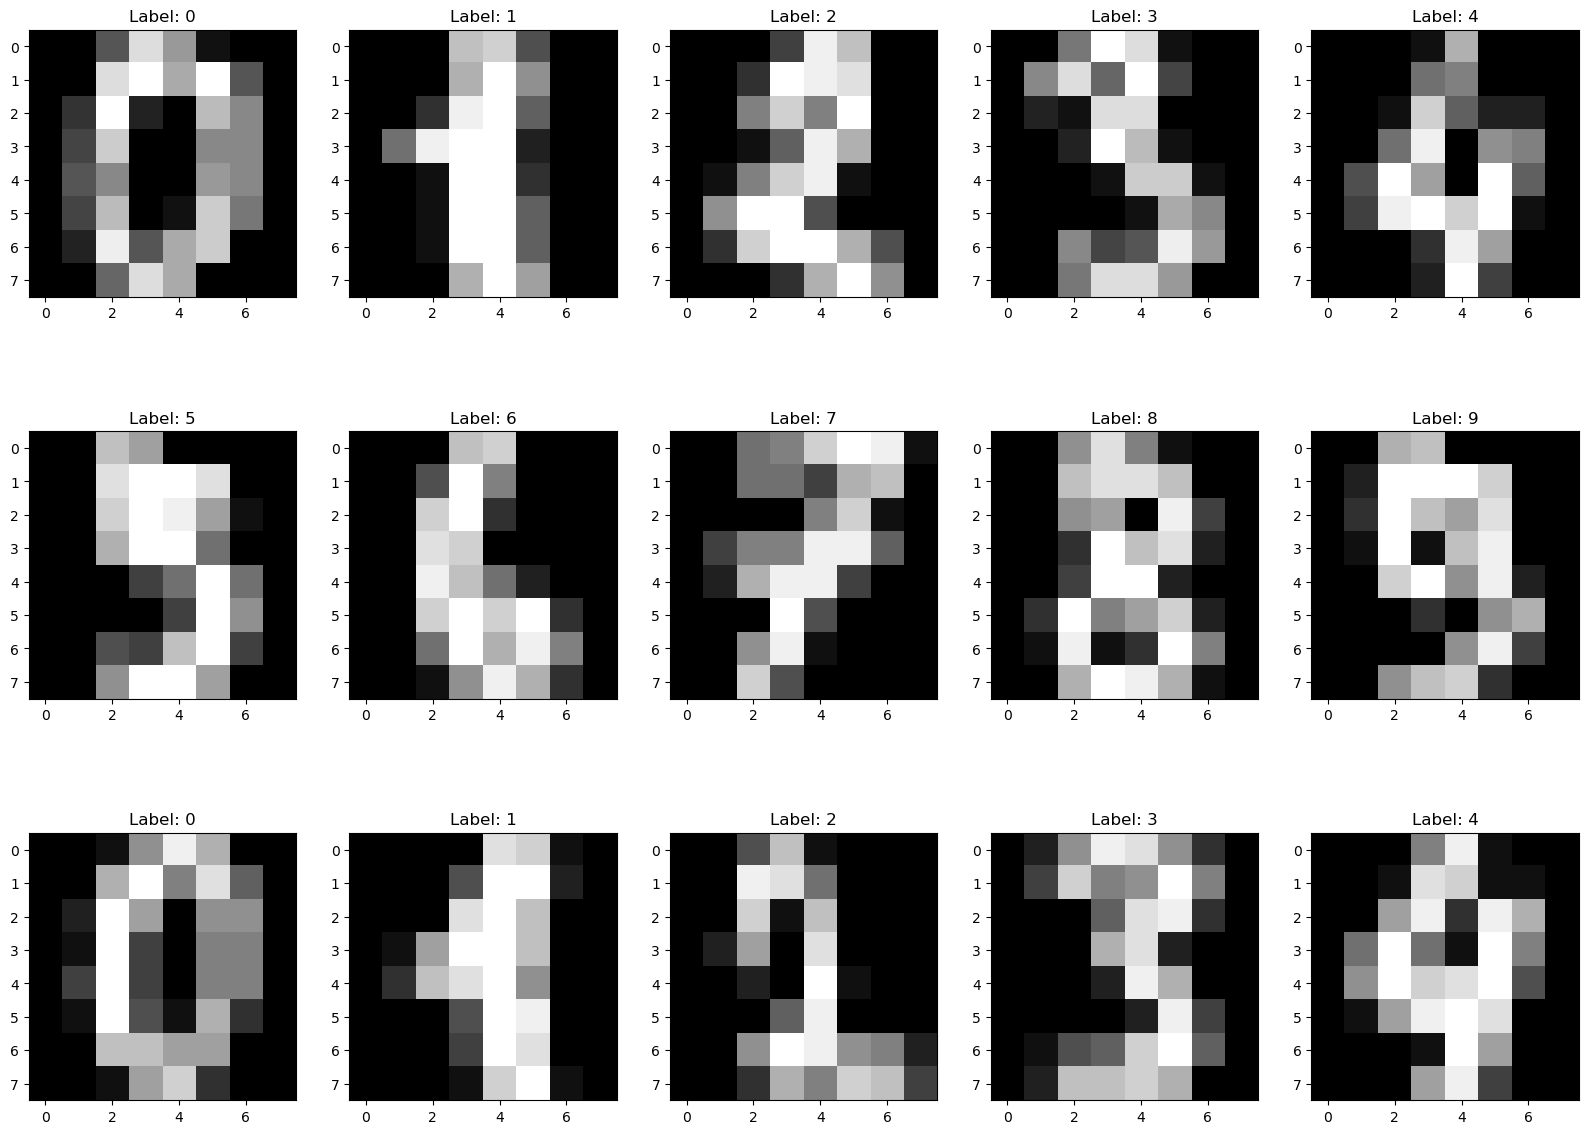

In [5]:
afficher(15)

## Training and Test Sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1347, 64), (450, 64), (1347,), (450,))

## La régression logistique

In [8]:
# instanciation du modèle
logit = LogisticRegression(max_iter=5000, solver='liblinear', C=0.01)
# entrainement du modèle 
logit.fit(X_train, y_train)
# prédictions
logit.predict(X_test[0].reshape(1,-1)) # de un élément
logit.predict(X_test[0:10]) # de plusieurs éléments
y_pred = logit.predict(X_test) # de tout le set de test
y_pred.shape

(450,)

## Évaluation du modèle

### Accuracy

In [9]:
# La méthdode scor du modèle renvoie l'accuracy
score = logit.score(X_test, y_test)
score

0.9666666666666667

### Precision et recall

In [10]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.94      1.00      0.97        46
           2       1.00      1.00      1.00        37
           3       0.98      0.90      0.93        48
           4       1.00      0.98      0.99        43
           5       0.92      0.98      0.95        50
           6       0.98      1.00      0.99        56
           7       0.97      1.00      0.99        34
           8       0.88      0.90      0.89        42
           9       1.00      0.93      0.96        54

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



### La matrice de confusion

In [11]:
cm = confusion_matrix(y_pred, y_test)
cm

array([[40,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 46,  0,  0,  0,  0,  0,  0,  3,  0],
       [ 0,  0, 37,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0, 42,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  2,  0, 49,  0,  0,  1,  1],
       [ 0,  0,  0,  0,  0,  1, 56,  0,  0,  0],
       [ 0,  0,  0,  1,  0,  0,  0, 34,  0,  0],
       [ 0,  0,  0,  2,  1,  0,  0,  0, 38,  2],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 50]])

In [12]:
# affichage sous forme de dataframe
cm = pd.DataFrame(cm, columns=['prédit ' + str(_) for _ in logit.classes_])
cm.index = ['vrai ' + str(_) for _ in logit.classes_]
cm

,prédit 0,prédit 1,prédit 2,prédit 3,prédit 4,prédit 5,prédit 6,prédit 7,prédit 8,prédit 9
vrai 0,40,0,0,0,0,0,0,0,0,0
vrai 1,0,46,0,0,0,0,0,0,3,0
vrai 2,0,0,37,0,0,0,0,0,0,0
vrai 3,0,0,0,43,0,0,0,0,0,1
vrai 4,0,0,0,0,42,0,0,0,0,0
vrai 5,0,0,0,2,0,49,0,0,1,1
vrai 6,0,0,0,0,0,1,56,0,0,0
vrai 7,0,0,0,1,0,0,0,34,0,0
vrai 8,0,0,0,2,1,0,0,0,38,2
vrai 9,0,0,0,0,0,0,0,0,0,50


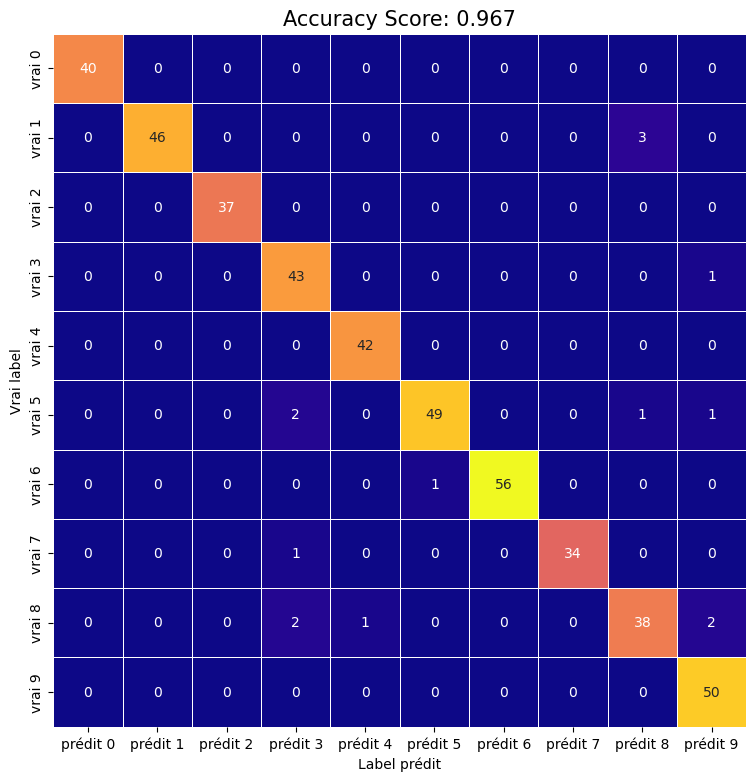

In [13]:
# affichage sous forme de graphique avec sns.heatmap
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt="d", linewidths=.5, square=True, cmap='plasma', cbar=False)
plt.ylabel('Vrai label')
plt.xlabel('Label prédit')
all_sample_title = f'Accuracy Score: {score:.3f}'
plt.title(all_sample_title, size = 15);

## Affichage des images qui ont été mal classées

Essayer de faire d'afficher les images quion été mal classées avec leurs labels prédit et vrai.

In [14]:
mal_classees = []
for index, (pred, vrai) in enumerate(zip(y_pred, y_test)):
    if pred != vrai: 
        mal_classees.append(index)
mal_classees

[26, 33, 87, 90, 161, 164, 268, 286, 292, 310, 326, 393, 394, 419, 445]

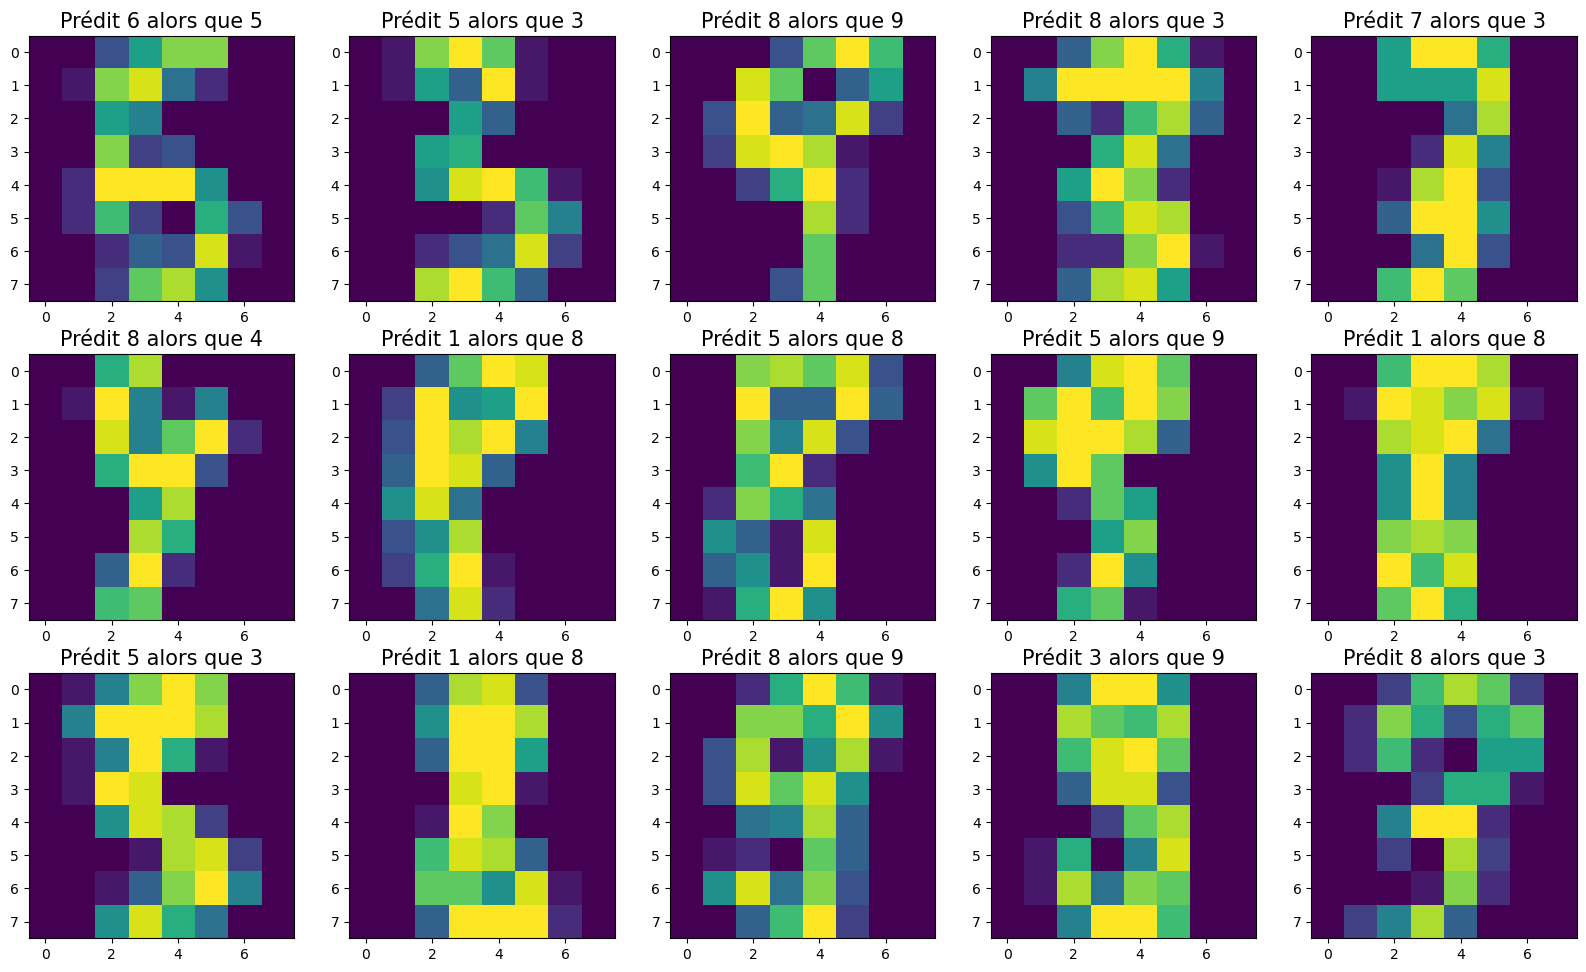

In [15]:
nb_col=5
nb_img = len(mal_classees)
nb_row = nb_img//nb_col+1

plt.figure(figsize=(20,5*nb_row))
for i in range(nb_img):
    idx_image = mal_classees[i]
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.reshape(X_test[idx_image], (8,8)))
    plt.title('Prédit {} alors que {}'.format(y_pred[idx_image], y_test[idx_image]), fontsize = 15)